# Sentiment Analysis Cyberbullying Dengan Pendekatan Pada Algoritma Machine Learning dan Deep Learning

* Nopandi Ariyanto - PREDICT

# Latar Belakang, Tujuan dan Urgensi

**Latar Belakang**
* Sentiment Analysis merupakan proses memahami, mengekstraksi, dan memproses teks/kalimat pada sebuah data secara otomatis untuk mendapatkan informasi sentimen yang terkandung dalam kalimat opini (komentar). Dalam Sentiment Analysis dilakukan proses mengidentifikasi komentar unsur cyberbullying yang dikirimkan oleh pengguna Instagram kepada pengguna lain. Oleh karena itu, diperlukan suatu algoritma yang dapat mengklasifikasikan komentar menjadi kelas positif dan kelas negatif. Adapun berbagai algoritma Machine Learning yang dapat digunakan yaitu Logistic Regression dan algoritma Deep Learning itu berupa: Bidirectional LSTM+Word2Vect dan BERT Fine Tuning. Didapat hasil yang terbaik dari perbandingan menggunakan algoritma Machine Learning dan Deep Learning berdasarkan hasil uji data pada performance model untuk menentukan prediksi dari Sentiment Analysis.

**Tujuan**
* Mengidentifikasikan komentar cyberbullying serta mengklasifikasikan komentar tersebut menjadi kelas positif dan negatif. Mendapatkan hasil performance terbaik berdasarkan perbandingan menggunakan algortima Machine Learning dan Deep Learning.

**Urgensi**
* Membuktikan terdapat komentar positif dan negatif yang mengandung unsur cyberbullying, serta membandingkan hasil performance model dari penggunaan algoritma Machine Learning yaitu Logistic Regression dan Deep Learning: Bidirectional LSTM+Word2Vect dan BERT Fine Tuning yang digunakan pada Sentiment Analysis.




# 01 Data Acquisition

## ♦ Import Library

Menyiapkan library package yang akan digunakan seperti numpy, pandas, seaborn, matplotlib untuk visualisasi data. Serta modul dari library sklearn yang digunakan untuk performance model.

In [1]:
import re
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## ♦ Load Dataset
Mendownload dataset dari github berupa dataset komentar instagram cyberbullying

In [2]:
# Download dataset
!wget https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv

--2022-10-05 00:33:10--  https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65494 (64K) [text/plain]
Saving to: ‘dataset_komentar_instagram_cyberbullying.csv’

dataset_komentar_in 100%[===================>]  63.96K  --.-KB/s    in 0.001s  

2022-10-05 00:33:10 (73.8 MB/s) - ‘dataset_komentar_instagram_cyberbullying.csv’ saved [65494/65494]



In [3]:
#Load dataset yang digunakan
data = pd.read_csv('dataset_komentar_instagram_cyberbullying.csv')
data.head()

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [4]:
#Rename column menjadi Instagram Comment Text-->igcomment
data = data.rename(columns={'Instagram Comment Text': 'igcomment'})
data.rename(columns={'Instagram Comment Text': 'igcomment'}, inplace=True)
data.head()

,Id,Sentiment,igcomment
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [5]:
#Total keseluruhan data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         400 non-null    int64 
 1   Sentiment  400 non-null    object
 2   igcomment  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [6]:
#Keseluruhan data negative dan positive
data["Sentiment"].value_counts()

negative    200
positive    200
Name: Sentiment, dtype: int64

# 02 Preprocessing Data
Melakukan preprocessing data sebelumnya pengujian model dengan beberapa teknik yang digunakan yaitu Casefolding, Stopwod Removal dan Text Preprocessing.

## ♦ Casefolding IG Comment

In [7]:
#Casefolding pada IG Comment
def igcomment_casefolding(text):
  #Mengubah teks menjadi lower case
  text = text.lower()
  #Menghapus URL                               
  text = re.sub(r'https?://\S+|www\.\S+', '', text) 
  #Menghapus angka
  text = re.sub(r'[-+]?[.\d]*[\d]+[:,.\d]*', '', text) 
  #Menghapus karakter tanda baca
  text = re.sub(r'[^\w\s]','', text)                
  text = text.strip()                             
  return text

In [8]:
raw_sample = data['igcomment'].iloc[100]
case_folding = igcomment_casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)

Raw data	:   <USERNAME> lebih memalukan anda buk ...ngomong pelakor emang ibuk udah pernah jadi pelakor ya kok bisa tau ayu pelakor wkwkwkwkwk. ..awas ibu nanti malah justru rumah tangga ibu yg dimasukin pelakor atau anaknya nanti jadi pelakor ..


Case folding	:  username lebih memalukan anda buk ngomong pelakor emang ibuk udah pernah jadi pelakor ya kok bisa tau ayu pelakor wkwkwkwkwk awas ibu nanti malah justru rumah tangga ibu yg dimasukin pelakor atau anaknya nanti jadi pelakor


## ♦ Stopword IG Comment

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize, sent_tokenize #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer

stopwords_ig = stopwords.words('indonesian')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
len(stopwords_ig)

758

In [11]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ig

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [12]:
#Buat variable dan fungsi untuk langkah stopword removal

#Menambahkan kata dalam daftar stopword
more_stopword = ['username', 'dan', 'yg', 'yang', 'di', 'bgt',
                 'ga', 'ini', 'itu', 'sama', 'n', 'tp', 'jd', 'sm'
                 'ya', 'gak', 'nya', 'lo', 'org', 'ya', 'aja', 'si', 
                 'lg', 'att', 'sih', 'sok', 'udh','jgn','krn','mbak', 
                 'jg','d', 'kl','mba','arti','lu', 'sm', '...','zzzzz', 
                 'ayu', 'gue', 'kalo', 'klo', 'biar', 'mah', 
                 'pake', 'kaya']
stopwords_ind = stopwords_ig + more_stopword

def igcomment_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [13]:
raw_sample = data['igcomment'].iloc[0]
case_folding = igcomment_casefolding(raw_sample)
stopword_removal = igcomment_stop_words(case_folding)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal: ', stopword_removal)

Raw data	:   <USERNAME> TOLOL!! Gak ada hubungan nya keguguran dgn pake hijab syar'i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy!! Otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar!


Case folding	:  username tolol gak ada hubungan nya keguguran dgn pake hijab syari yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar


Stopword removal:  tolol hubungan keguguran dgn hijab syari bilang bayi kepanasan didalem hubungan woyyyy otak jempol singkron nulis komentar


## ♦ Stemming IG Comment

In [14]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 24.0 MB/s 


In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [16]:
raw_sample       = data['igcomment'].iloc[0]
case_folding     = igcomment_casefolding(raw_sample)
stopword_removal = igcomment_stop_words(case_folding)
text_stemming    = stemming(stopword_removal)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal: ', stopword_removal)
print('\n\nStemming\t: ', text_stemming)

Raw data	:   <USERNAME> TOLOL!! Gak ada hubungan nya keguguran dgn pake hijab syar'i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy!! Otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar!


Case folding	:  username tolol gak ada hubungan nya keguguran dgn pake hijab syari yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar


Stopword removal:  tolol hubungan keguguran dgn hijab syari bilang bayi kepanasan didalem hubungan woyyyy otak jempol singkron nulis komentar


Stemming	:  tolol hubung gugur dgn hijab syar bilang bayi panas dalem hubung woyyyy otak jempol singkron nulis komentar


## Lemmatizeer IG Comment

In [17]:
import string
nltk.download('wordnet')
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [18]:
def clean_igcomment(text,lemmatize = True):
   soup = BeautifulSoup(text, "html.parser") #remove html tags
   text = re.sub(r'\.(?=\S)', '. ',text)
   text = soup.get_text()
   text = "".join([word.lower() for word in text if word not in string.punctuation])
   
   if lemmatize:
     text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stopwords_ig and word.isalpha()]) #lemmatize
   else:
     text = " ".join([word for word in text.split() if word not in stopwords_ig and word.isalpha()])
   return text

In [19]:
raw_sample       = data['igcomment'].iloc[0]
case_folding     = igcomment_casefolding(raw_sample)
stopword_removal = igcomment_stop_words(case_folding)
text_stemming    = stemming(stopword_removal)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal: ', stopword_removal)
print('\n\nStemming\t: ', text_stemming)

Raw data	:   <USERNAME> TOLOL!! Gak ada hubungan nya keguguran dgn pake hijab syar'i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy!! Otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar!


Case folding	:  username tolol gak ada hubungan nya keguguran dgn pake hijab syari yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar


Stopword removal:  tolol hubungan keguguran dgn hijab syari bilang bayi kepanasan didalem hubungan woyyyy otak jempol singkron nulis komentar


Stemming	:  tolol hubung gugur dgn hijab syar bilang bayi panas dalem hubung woyyyy otak jempol singkron nulis komentar


## ♦ Text Preprocessing

In [20]:
# Tokenize Kata pada setiap preprocessing data
def text_preprocessing_process(text):
    text = igcomment_casefolding(text)
    text = igcomment_stop_words(text)
    #text = stemming(text)
    #ext = clean_igcomment(text)
    return text

In [21]:
!pip -q install swifter

     |████████████████████████████████| 830 kB 28.8 MB/s 
     |████████████████████████████████| 281 kB 69.7 MB/s 
     |████████████████████████████████| 1.6 MB 28.5 MB/s 


In [22]:
import swifter
%time


data['clean_igcomment'] = data['igcomment'].swifter.apply(text_preprocessing_process)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


Pandas Apply:   0%|          | 0/400 [00:00<?, ?it/s]

In [23]:
data

,Id,Sentiment,igcomment,clean_igcomment
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,tolol hubungan keguguran dgn hijab syari bilan...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek tatacowo dibelain balikanhadewwntar dit...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek skr lengket duhhh labil kya abeg...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kesel gausah anaknya kasian perkembang...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan lgsakit jiwaknp peran utama...
...,...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...,bangga suami istri disela apapun profesimu kau...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun pekerjaannya halal u tuk menafkahi kelu...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...,gojek mayoritas pegangguran kerja trus putus a...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...,aslinya cantik loh bertemu langsung sesembakny...


In [24]:
#Mengubal label negative dan positive menjadi numeric
data.Sentiment = [ 1 if each == "positive" else 0 for each in data.Sentiment]
data

,Id,Sentiment,igcomment,clean_igcomment
0,1,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,tolol hubungan keguguran dgn hijab syari bilan...
1,2,0,Geblek lo tata...cowo bgt dibela2in balikan......,geblek tatacowo dibelain balikanhadewwntar dit...
2,3,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek skr lengket duhhh labil kya abeg...
3,4,0,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kesel gausah anaknya kasian perkembang...
4,5,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan lgsakit jiwaknp peran utama...
...,...,...,...,...
395,396,1,Bangga sama suami yg selalu ingat istri disela...,bangga suami istri disela apapun profesimu kau...
396,397,1,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun pekerjaannya halal u tuk menafkahi kelu...
397,398,1,Gojek itu mayoritas pegangguran yang lama gak ...,gojek mayoritas pegangguran kerja trus putus a...
398,399,1,<USERNAME> aslinya cantik dan ayu loh mbak kr...,aslinya cantik loh bertemu langsung sesembakny...


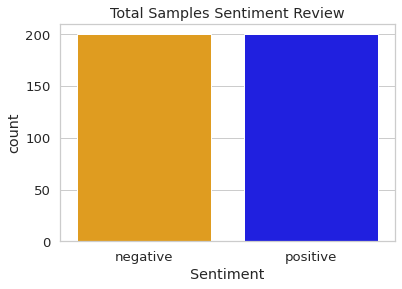

In [25]:
sns.set(style = "whitegrid" , font_scale = 1.2)
sns.countplot(data.Sentiment,palette = ['orange','blue'],order = [0,1])
plt.xticks(ticks = np.arange(2),labels = ['negative','positive'])
plt.title('Total Samples Sentiment Review')
plt.show()

In [26]:
print('Jumlah Sentiment Negative', (round(data['Sentiment'].value_counts()[0])),'Precentage:', round(data['Sentiment'].value_counts()[0]/len(data) * 100,2), '%')
print('Jumlah Sentiment Positive', (round(data['Sentiment'].value_counts()[1])),'Precentage:',round(data['Sentiment'].value_counts()[1]/len(data) * 100,2), '%')

Jumlah Sentiment Negative 200 Precentage: 50.0 %
Jumlah Sentiment Positive 200 Precentage: 50.0 %


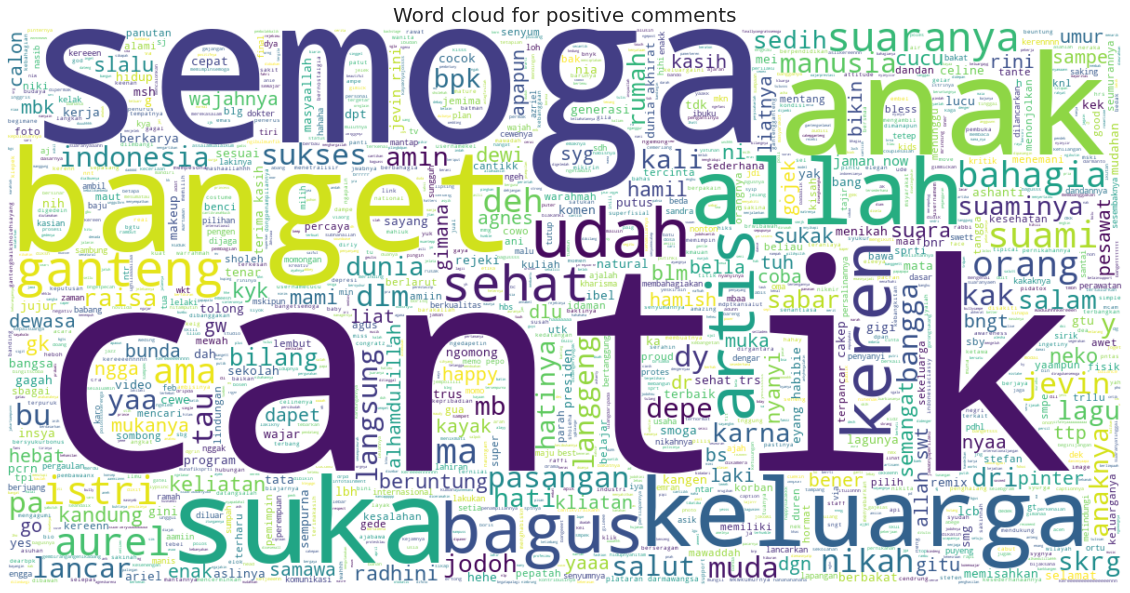

In [27]:
#word cloud for positive reviews
import os
from wordcloud import WordCloud

positive_data = data[data.Sentiment == 1]['clean_igcomment']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2500, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive comments',fontsize = 20)
plt.show()

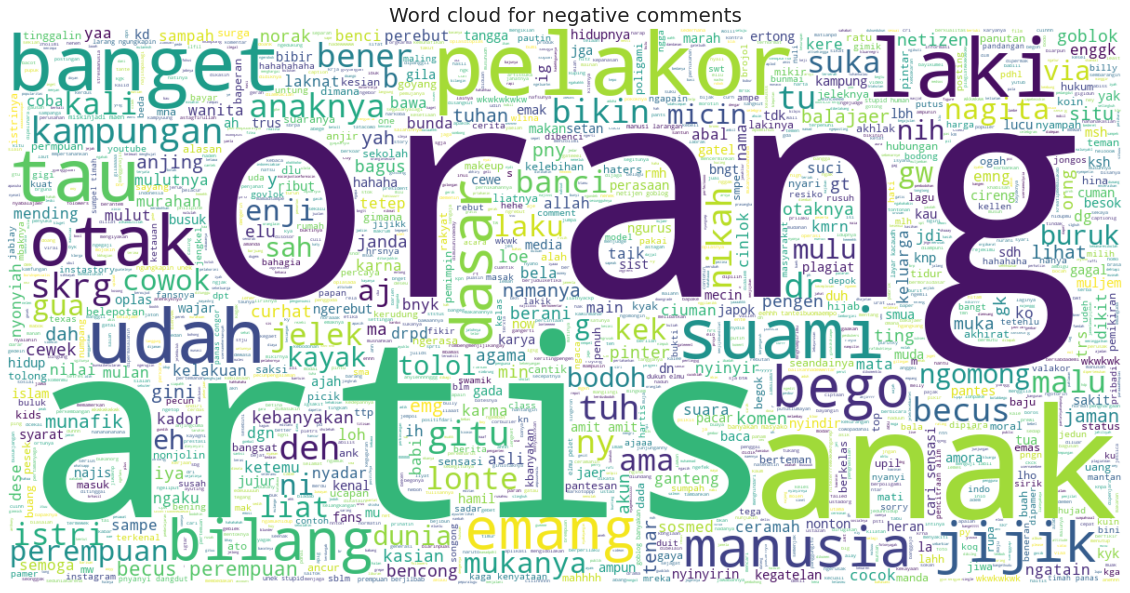

In [28]:
#word cloud for negative reviews
negative_data = data[data.Sentiment == 0]['clean_igcomment']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2500, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative comments',fontsize = 20)
plt.show()

In [29]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(data.clean_igcomment)
corpus[:5]

['tolol', 'hubungan', 'keguguran', 'dgn', 'hijab']

In [30]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

,corpus,countv
0,anak,54
1,orang,53
2,banget,47
3,artis,42
4,semoga,40
5,cantik,39
6,udah,31
7,suka,29
8,suami,26
9,allah,24


In [31]:
most_common = most_common.sort_values('countv')

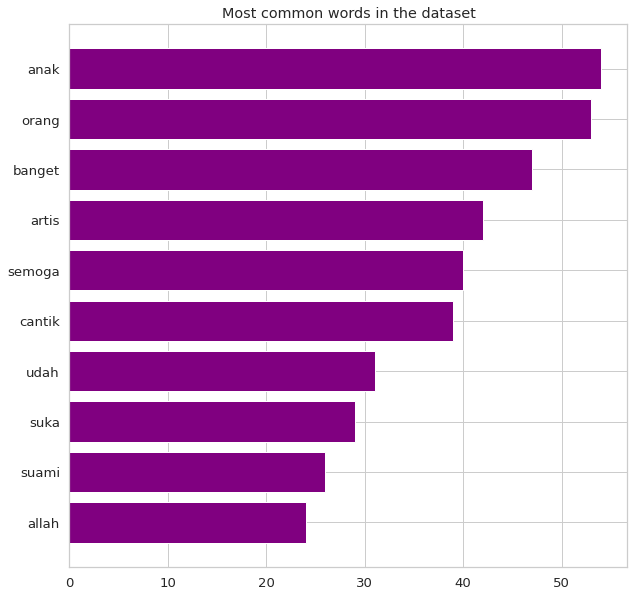

In [32]:
plt.figure(figsize =(10,10))
plt.yticks(range(len(most_common)), list(most_common.corpus))
plt.barh(range(len(most_common)), list(most_common.countv),align='center',color = 'purple')
plt.title('Most common words in the dataset')
plt.show()

# 03 Feature Extraction
Setiap data training dan data testing akan diberikan bobot menggunakan teknik TF-IDF. Pembobotan
proses menggunakan TF-IDF dimulai dengan mencari jumlah term dalam setiap dokumen.

Kemudian Feature Selection menggunakan K-Best untuk memilih feature dan menghasil feature yang terbaik sebelum dilakukan pemodelan.

## ♦ TF-IDF Vectorizing Data

In [33]:
#Vectorizing pada data clean_igcomment 
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(data['clean_igcomment'])

TfidfVectorizer()

In [34]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

2882


In [35]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['aamiin' 'aammiinnn' 'abal' ... 'yutub' 'zaman' 'zholimi']


In [36]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(data['clean_igcomment']).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aamiin,aammiinnn,abal,abang,abbey,abege,abiiis,abis,abiss,abu,...,yng,yo,yoo,you,youtube,yra,yuk,yutub,zaman,zholimi
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.229841,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ♦ Feature Selection K-Best

In [38]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(data['Sentiment'])

In [39]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 2882
Reduced feature number: 1000


In [40]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.640969
1,0.245087
2,0.903813
3,0.004296
4,0.460814
...,...
2877,0.422262
2878,0.175017
2879,0.199049
2880,0.176105


In [41]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
509,6.694509e+00,cantik
2428,5.095719e+00,semoga
1321,3.978917e+00,keren
2091,3.888976e+00,pelakor
287,3.491716e+00,bego
...,...,...
477,2.937079e-05,bulu
2749,2.133863e-05,udah
421,1.817615e-05,bner
1149,1.082673e-05,jet


In [42]:
# Menampilkan mask pada feature yang diseleksi
mask = chi2_features.get_support()
mask

array([ True, False,  True, ..., False, False, False])

In [43]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['aamiin',
 'abal',
 'abbey',
 'acha',
 'adat',
 'admin',
 'after',
 'agus',
 'ah',
 'aj',
 'ajaaa',
 'ajalah',
 'ak',
 'akhlak',
 'akun',
 'akuuu',
 'alami',
 'alesha',
 'alhamdulillah',
 'alim',
 'allah',
 'allahaamiin',
 'am',
 'amazing',
 'amiiii',
 'amiin',
 'amin',
 'amit',
 'amora',
 'ampuuunmalu',
 'an',
 'anakanaknya',
 'anang',
 'ancur',
 'angguunn',
 'ani',
 'anjing',
 'anjir',
 'anjirrrr',
 'anyiennnnggg',
 'apain',
 'apaoun',
 'apapun',
 'apik',
 'ariel',
 'artika',
 'artis',
 'ashanti',
 'asik',
 'asli',
 'aslii',
 'aslinya',
 'ato',
 'audisi',
 'aurel',
 'awet',
 'ayahnya',
 'ayuneemana',
 'ayuuterlihat',
 'azriel',
 'babang',
 'babi',
 'babiii',
 'baca',
 'badaaiik',
 'baguass',
 'bagus',
 'bagusnya',
 'bagusss',
 'bagussss',
 'bahagia',
 'bahagianya',
 'bak',
 'bakat',
 'bakatnya',
 'bala',
 'balajaer',
 'balikanhadewwntar',
 'banci',
 'bang',
 'bangeeet',
 'bangeg',
 'banget',
 'bangetsemoga',
 'bangett',
 'bangetttt',
 'bangetttttttt',
 'bangga',
 'bangsa',
 'bangsat

In [44]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    
  if k in selected_feature:                 
    kbest_feature[k] = v                    

kbest_feature

{'tolol': 2707,
 'hijab': 1016,
 'bilang': 395,
 'otak': 2034,
 'geblek': 878,
 'tatacowo': 2629,
 'dibelain': 654,
 'balikanhadewwntar': 216,
 'nyalahin': 1982,
 'tuh': 2724,
 'cowopadahal': 566,
 'kitenya': 1358,
 'oon': 2015,
 'ato': 158,
 'sensasi': 2439,
 'kasian': 1214,
 'orang': 2022,
 'bener': 309,
 'seandainya': 2380,
 'perasaan': 2139,
 'namanya': 1833,
 'manusia': 1566,
 'haters': 987,
 'permpuan': 2160,
 'artis': 139,
 'pantesan': 2061,
 'tinggalin': 2696,
 'laki': 1438,
 'mikir': 1716,
 'ngurus': 1927,
 'becus': 277,
 'mending': 1644,
 'balajaer': 213,
 'ig': 1044,
 'bikin': 393,
 'asik': 147,
 'lagu': 1432,
 'laknat': 1443,
 'banget': 226,
 'kelakuan': 1274,
 'indonesia': 1059,
 'bodoh': 431,
 'buruk': 489,
 'murahan': 1806,
 'berkelas': 335,
 'janda': 1120,
 'bego': 287,
 'pny': 2221,
 'kpn': 1397,
 'laginya': 1431,
 'anyiennnnggg': 118,
 'suaranya': 2572,
 'ancur': 95,
 'tukang': 2729,
 'gorengan': 925,
 'syarat': 2602,
 'sah': 2333,
 'islam': 1084,
 'mas': 1572,
 'emak

In [45]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning
# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aamiin,abal,abbey,acha,adat,admin,after,agus,ah,aj,...,yah,yatuhan,yeee,yes,yesss,yesssssss,yng,you,youtube,yra
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 04 Build Model 
* Membangun model Machine Learning menggunakan Logistic Regression dan menghasilkan performance model berdasarkan uji data testing sebesar: 96.25%.

* Membangun model Deep Leaning menggunakan Bi-LSTM+Word2Vect dan menghasilkan performance model berdasarkan uji data testing sebesar: 80.00%.

* Membangun model Deep Leaning menggunakan BERT Fine Tuning dan menghasilkan performance model berdasarkan uji data testing sebesar: 96.88%.

## ♦ Logistic Regression

### Train test split data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, data['Sentiment'], test_size=0.2, random_state=40)

### Evaluasi Model

Logistic Regression Accuracy : 96.25%


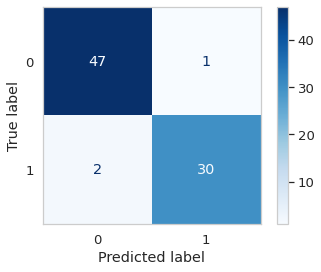

In [47]:
#Model Machine Learning yang digunakan
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_kbest_features,data['Sentiment'])
predict1=lr.predict(X_test)
score1=accuracy_score(y_test,predict1)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*score1))
plot_confusion_matrix(lr, X_test, y_test,cmap = 'Blues')
plt.grid(False)

In [48]:
logistic_pred = lr.predict(X_test)

# Tampilkan hasil prediksi label dari model
logistic_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [49]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, logistic_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.97      0.94      0.95        32

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



## ♦ Bi-LSTM + Word2Vect

### Preparing Word2Vect

In [50]:
def tokenization(text):
  text = re.split('\W+', text)
  return text

sentences = data['clean_igcomment'].apply(lambda x: tokenization(x.lower()))
sentences

0      [tolol, hubungan, keguguran, dgn, hijab, syari...
1      [geblek, tatacowo, dibelain, balikanhadewwntar...
2      [kmrn, termewek, skr, lengket, duhhh, labil, k...
3      [intinya, kesel, gausah, anaknya, kasian, perk...
4      [hadewwwww, permpuan, lgsakit, jiwaknp, peran,...
                             ...                        
395    [bangga, suami, istri, disela, apapun, profesi...
396    [apaoun, pekerjaannya, halal, u, tuk, menafkah...
397    [gojek, mayoritas, pegangguran, kerja, trus, p...
398    [aslinya, cantik, loh, bertemu, langsung, sese...
399    [suami, seumuran, tuaan, alhamdulillah, suami,...
Name: clean_igcomment, Length: 400, dtype: object

### Training Word2vect

In [51]:
# Defenisikan parameter training Word2Vec

EMBEDDING_SIZE = 1000    # Dimensi word vektor / neuron pada projection (hidden) layer
WINDOW_SIZE = 5         # Window size. Jarak maksimum antara kata saat ini dan yang diprediksi dalam sebuah
MIN_WORD  = 1           # Model akan mengabaikan semua kata dengan frekuensi total lebih rendah dari ini (opsional)
EPOCH = 10              # Jumlah iterasi (epoch).
SG = 1                  # Strategi algoritma pelatihan: 1 untuk skip-gram, 0 untuk CBOW
NEGATIVE = 5            # Negative sampling. Jika 0, negative sampling tidak digunakan

In [52]:
%%time 

# Proses training Word2Vec
from gensim.models import Word2Vec, FastText, KeyedVectors

model_word2vec = Word2Vec(sentences, size=EMBEDDING_SIZE, sg=SG, min_count=MIN_WORD, window=WINDOW_SIZE, negative=NEGATIVE, iter=EPOCH)

CPU times: user 2.28 s, sys: 63.2 ms, total: 2.35 s
Wall time: 3.64 s


### Save Word2vect

In [53]:
# Save Word2Vec sebagai full model
model_word2vec.save('myvec-word2vec-100.model')
# Save Word2Vec sebagai wordvectors. Hanya menyimpan kata & trained embeddingnya
word2vec_word_vectors = model_word2vec.wv
word2vec_word_vectors.save('myvec-word2vec-100.wordvectors')

In [54]:
# Save Word2Vec sebagai wordvectors. Hanya menyimpan kata & trained embeddingnya
word2vec_word_vectors = model_word2vec.wv
word2vec_word_vectors.save('myvec-word2vec-100.wordvectors')

### Load Word2vect

In [55]:
# Load word2vec yang telah kita simpan
from gensim.models import KeyedVectors

my_word2vec = KeyedVectors.load('myvec-word2vec-100.wordvectors', mmap='r')
my_word2vec_vocab = my_word2vec.wv.vocab     

VOCAB_SIZE = len(my_word2vec_vocab)
EMBEDDING_SIZE = my_word2vec.vector_size

print(VOCAB_SIZE)
print(EMBEDDING_SIZE)

2896
1000


In [56]:
word2vec_dict = {}

for word in my_word2vec_vocab:
    word2vec_dict[word] = my_word2vec.wv.get_vector(word)   
    
print('The numbers of key-value pairs: ', len(word2vec_dict)) # Harus sama dengan ukuran vocab word2vec

The numbers of key-value pairs:  2896


### Max Length

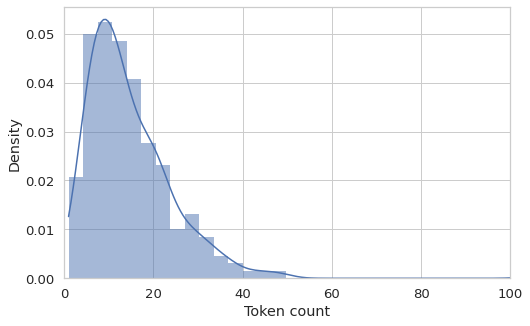

In [57]:
token_lens = []

for text in data['clean_igcomment']:
    tokens = text.split()
    token_lens.append(len(tokens))

plt.figure(figsize=(8, 5))
sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [58]:
MAX_SEQ_LENGTH = 60

### Preparing Embedding Layer
###Tokenizing Data
Proses ini berbeda dengan tokenization pada text-preprocessing. Pada pemodelan dengan deep learning, tokenization merujuk pada membuat dictionary berdasarkan dataset.

In [59]:
from keras.preprocessing.text import Tokenizer

In [60]:
NUM_WORDS = 100       # Frekuensi kemunculan kata. Hanya num_words-1 yang akan disimpan pada dictionary. Berarti kata dengan kemunculan <=num_words tidak digunakan.
OOV_TOKEN = '<unk>'   # Token khusus untuk mengganti kata yang tidak terdaftar dalam dictionary.

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token=OOV_TOKEN, lower=True, split=' ')
tokenizer.fit_on_texts(data['clean_igcomment'])

# Tambahkan token padding untuk menyamakan ukuran dimensi embedding layer
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

WV_DICTIONARY = tokenizer.word_index

WV_DICTIONARY_SIZE = len(WV_DICTIONARY)
print(WV_DICTIONARY_SIZE) # Lihat kata unik pada dictionary yang dihasilkan

2897


### Text to Sequence

In [61]:
# Proses mengubah token hasil tokenisasi menjadi urutan bilangan int berdasarkan index dictionary.
data_seq = tokenizer.texts_to_sequences(data['clean_igcomment'])
# Lihat hasil setelah di ubah menjadi sequences
print(data['clean_igcomment'][10])
print(data_seq[10])

syarat sah nikah agama islam cpp cpw saksi wali nikah mas kawinmahar perkara makeup manglingi syarat sah pernikahan makeup syarat terpenuhi pernikahannya sah yak emak emak julids
[1, 1, 19, 1, 1, 1, 1, 1, 1, 19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Add to Padding

In [62]:
from keras.preprocessing.sequence import pad_sequences

In [63]:
PADDING = 'post'        # Menambahkan padding
TRUNCATING = 'post'     

data_pad = pad_sequences(data_seq, maxlen=MAX_SEQ_LENGTH, padding=PADDING, truncating=TRUNCATING)
print(data['clean_igcomment'][10])
print(data_seq[10])
print(data_pad[10])

syarat sah nikah agama islam cpp cpw saksi wali nikah mas kawinmahar perkara makeup manglingi syarat sah pernikahan makeup syarat terpenuhi pernikahannya sah yak emak emak julids
[1, 1, 19, 1, 1, 1, 1, 1, 1, 19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[ 1  1 19  1  1  1  1  1  1 19  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]


### One-hot Encoding

In [64]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(data['Sentiment'], num_classes=len(data['Sentiment'].unique()))  # Lakukan one-hot encoding pada label (y)

In [65]:
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

### Create Embedding Matrix

In [66]:
EMBEDDING_MATRIX = np.zeros(shape=(WV_DICTIONARY_SIZE, EMBEDDING_SIZE))

for word, i in tokenizer.word_index.items():
  embed_vector = word2vec_dict.get(word)
  if embed_vector is not None:               # Word is in the vocabulary learned by the w2v model
    EMBEDDING_MATRIX[i] = embed_vector

In [140]:
#Build model Bi-LStM dengan Word2Vect
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.initializers import Constant

model_BiLSTM_w2v = Sequential()
model_BiLSTM_w2v.add(Embedding(
    input_dim = WV_DICTIONARY_SIZE,
    output_dim = EMBEDDING_SIZE,
    input_length = MAX_SEQ_LENGTH,
    trainable = True,
    embeddings_initializer = Constant(EMBEDDING_MATRIX)))
model_BiLSTM_w2v.add(Bidirectional(LSTM(64)))
model_BiLSTM_w2v.add(Dropout(0.5))
model_BiLSTM_w2v.add(Dense(16, activation='relu'))
model_BiLSTM_w2v.add(Dense(2, activation='softmax'))

In [141]:
model_BiLSTM_w2v.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 60, 1000)          2897000   
                                                                 
 bidirectional_9 (Bidirectio  (None, 128)              545280    
 nal)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 16)                2064      
                                                                 
 dense_18 (Dense)            (None, 2)                 34        
                                                                 
Total params: 3,444,378
Trainable params: 3,444,378
Non-trainable params: 0
____________________________________________

In [142]:
# Compile model
model_BiLSTM_w2v.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),
          loss=tf.keras.losses.categorical_crossentropy,
          metrics=['accuracy'],)

### Training Model

In [143]:
# Split arrays or matrices into random train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(data_pad, Y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((360, 60), (40, 60), (360, 2), (40, 2))

In [144]:
%%time

initial_epochs = 20
BATCH_SIZE = 32

history_BiLSTM_w2v = model_BiLSTM_w2v.fit(X_train, y_train, epochs=initial_epochs, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/20
12/12 [==============================] - 4s 83ms/step - loss: 0.6947 - accuracy: 0.5417 - val_loss: 0.6732 - val_accuracy: 0.7000
Epoch 2/20
12/12 [==============================] - 0s 16ms/step - loss: 0.6598 - accuracy: 0.6472 - val_loss: 0.6039 - val_accuracy: 0.8000
Epoch 3/20
12/12 [==============================] - 0s 14ms/step - loss: 0.5674 - accuracy: 0.7500 - val_loss: 0.4321 - val_accuracy: 0.8000
Epoch 4/20
12/12 [==============================] - 0s 13ms/step - loss: 0.4454 - accuracy: 0.7972 - val_loss: 0.3902 - val_accuracy: 0.7750
Epoch 5/20
12/12 [==============================] - 0s 13ms/step - loss: 0.3666 - accuracy: 0.8278 - val_loss: 0.4266 - val_accuracy: 0.8000
Epoch 6/20
12/12 [==============================] - 0s 14ms/step - loss: 0.3508 - accuracy: 0.8278 - val_loss: 0.3939 - val_accuracy: 0.8000
Epoch 7/20
12/12 [==============================] - 0s 14ms/step - loss: 0.3339 - accuracy: 0.8389 - val_loss: 0.4115 - val_accuracy: 0.8250
Epoch 8/20
12

In [146]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_BiLSTM_w2v.history['accuracy'][i], history_BiLSTM_w2v.history['loss'][i], history_BiLSTM_w2v.history['val_accuracy'][i], history_BiLSTM_w2v.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.541667 	   0.694670 	   0.700000 	   0.673194
       2   0.647222 	   0.659777 	   0.800000 	   0.603881
       3   0.750000 	   0.567442 	   0.800000 	   0.432113
       4   0.797222 	   0.445424 	   0.775000 	   0.390197
       5   0.827778 	   0.366573 	   0.800000 	   0.426565
       6   0.827778 	   0.350841 	   0.800000 	   0.393931
       7   0.838889 	   0.333949 	   0.825000 	   0.411497
       8   0.861111 	   0.313086 	   0.800000 	   0.428375
       9   0.858333 	   0.283951 	   0.800000 	   0.507829
      10   0.861111 	   0.273324 	   0.825000 	   0.497007


In [147]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

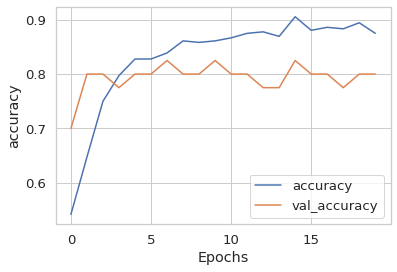

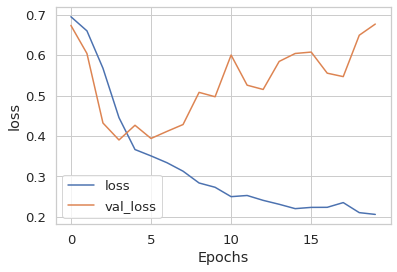

In [148]:
plot_graphs(history_BiLSTM_w2v, 'accuracy')
plot_graphs(history_BiLSTM_w2v, 'loss')

### Evaluate Model

In [149]:
# Prediksi pada data testing
y_pred = np.argmax(model_BiLSTM_w2v.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

loss, accuracy = model_BiLSTM_w2v.evaluate(X_test, y_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.6766 - accuracy: 0.8000


In [150]:
# Tampilkan laporan klasifikasi model pada data testing
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76        13
           1       1.00      0.70      0.83        27

    accuracy                           0.80        40
   macro avg       0.81      0.85      0.80        40
weighted avg       0.88      0.80      0.81        40



## ♦ BERT Fine Tuning

### Load Tokenizer BERT

In [77]:
data_model = data.copy()

In [78]:
!pip -q install transformers

     |████████████████████████████████| 4.9 MB 21.8 MB/s 
     |████████████████████████████████| 6.6 MB 58.6 MB/s 
     |████████████████████████████████| 163 kB 70.6 MB/s 


In [79]:
# Menentukan pre-trained model yang akan digunakan untuk fine-tuning

import transformers

pre_trained = 'distilbert-base-uncased'

from transformers import BertTokenizer

tokenizer_bert = BertTokenizer.from_pretrained(pre_trained)  # Load tokenizer dari pre-trained model

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [80]:
# Lihat vocabulary dari pre-trained model yang telah di load sebelumnya
vocabulary = tokenizer_bert.get_vocab()

print('Panjang vocabulary:', len(vocabulary))
print(vocabulary)

Panjang vocabulary: 30522
{'[PAD]': 0, '[unused0]': 1, '[unused1]': 2, '[unused2]': 3, '[unused3]': 4, '[unused4]': 5, '[unused5]': 6, '[unused6]': 7, '[unused7]': 8, '[unused8]': 9, '[unused9]': 10, '[unused10]': 11, '[unused11]': 12, '[unused12]': 13, '[unused13]': 14, '[unused14]': 15, '[unused15]': 16, '[unused16]': 17, '[unused17]': 18, '[unused18]': 19, '[unused19]': 20, '[unused20]': 21, '[unused21]': 22, '[unused22]': 23, '[unused23]': 24, '[unused24]': 25, '[unused25]': 26, '[unused26]': 27, '[unused27]': 28, '[unused28]': 29, '[unused29]': 30, '[unused30]': 31, '[unused31]': 32, '[unused32]': 33, '[unused33]': 34, '[unused34]': 35, '[unused35]': 36, '[unused36]': 37, '[unused37]': 38, '[unused38]': 39, '[unused39]': 40, '[unused40]': 41, '[unused41]': 42, '[unused42]': 43, '[unused43]': 44, '[unused44]': 45, '[unused45]': 46, '[unused46]': 47, '[unused47]': 48, '[unused48]': 49, '[unused49]': 50, '[unused50]': 51, '[unused51]': 52, '[unused52]': 53, '[unused53]': 54, '[unused

In [81]:
# Contoh Tokenisasi

data_id = 5 # Mengambil data indeks ke-5 pada dataframe

print('Kalimat:', data_model.clean_igcomment[data_id])
print('BERT Tokenizer:', tokenizer_bert.tokenize(data_model.clean_igcomment[data_id]))

Kalimat: pantesan tinggalin laki lakinya mikir kali perempuannya kayagni ngurus becus gimana ngurus anak mending anak bapake bener didiknya
BERT Tokenizer: ['pan', '##tes', '##an', 'ting', '##gal', '##in', 'la', '##ki', 'la', '##kin', '##ya', 'mi', '##kir', 'kali', 'pere', '##mp', '##uan', '##nya', 'kay', '##ag', '##ni', 'ng', '##urus', 'be', '##cus', 'gi', '##mana', 'ng', '##urus', 'ana', '##k', 'men', '##ding', 'ana', '##k', 'ba', '##pa', '##ke', 'ben', '##er', 'did', '##ik', '##nya']


### Input Formating
Teks harus dipecah menjadi token sebelum dimasukkan ke BERT, kemudian token tersebut harus dipetakan ke indeks pada kosakata tokenizer yang telah di load sebelumnya. Tokenisasi harus dilakukan oleh tokenizer yang disertakan dengan BERT.

In [82]:
# Contoh input formatting untuk BERT. Input formating dapat menggunakan fungsi `encode_plus`

bert_input = tokenizer_bert.encode_plus(
    data_model.clean_igcomment[data_id],             # Sample kalimat                
    add_special_tokens = True,      # Tambahkan token [CLS] pada awal kalimat dan token [SEP] pada akhir kalimat
    padding = 'max_length',         # Tambahkan padding ke max_length menggunakan token [PAD] jika kalimat kurang dari max_length
    truncation = 'longest_first',   # Truncate jika kalismat lebih dari max_length
    max_length = 50,                # Tentukan max_length dari seluruh kalimat
    return_attention_mask = True,   # Mengembalikan nilai attention mask
    return_token_type_ids =True     # Mengembalikan nilai token type id (segment embedding)
    )

# Fungsi `encode_plus` mengembalikan 3 nilai: input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [83]:
print('Kalimat\t\t:', data_model.clean_igcomment[data_id])                                           # Data asli
print('Tokenizer\t:', tokenizer_bert.convert_ids_to_tokens(bert_input['input_ids']))    # Hasil input formatting + tokenizer
print('Input IDs\t:', bert_input['input_ids'])                                          # Input IDs : indeks token pada vocabulary tokenizer
print('Token Type IDs\t:', bert_input['token_type_ids'])                                # Token type IDs : menunjukkan urutan kalimat pada sequence (segment embedding)
print('Attention Mask\t:', bert_input['attention_mask'])                                # Attention mask : mengembalikan nilai [0,1]. 1 artinya token yang di masking, 0 token yang tidak di masking (diabaikan)

Kalimat		: pantesan tinggalin laki lakinya mikir kali perempuannya kayagni ngurus becus gimana ngurus anak mending anak bapake bener didiknya
Tokenizer	: ['[CLS]', 'pan', '##tes', '##an', 'ting', '##gal', '##in', 'la', '##ki', 'la', '##kin', '##ya', 'mi', '##kir', 'kali', 'pere', '##mp', '##uan', '##nya', 'kay', '##ag', '##ni', 'ng', '##urus', 'be', '##cus', 'gi', '##mana', 'ng', '##urus', 'ana', '##k', 'men', '##ding', 'ana', '##k', 'ba', '##pa', '##ke', 'ben', '##er', 'did', '##ik', '##nya', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs	: [101, 6090, 4570, 2319, 28642, 9692, 2378, 2474, 3211, 2474, 4939, 3148, 2771, 23630, 19924, 23976, 8737, 13860, 17238, 10905, 8490, 3490, 12835, 20089, 2022, 7874, 21025, 24805, 12835, 20089, 9617, 2243, 2273, 4667, 9617, 2243, 8670, 4502, 3489, 3841, 2121, 2106, 5480, 17238, 102, 0, 0, 0, 0, 0]
Token Type IDs	: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Max Lenght Sequence

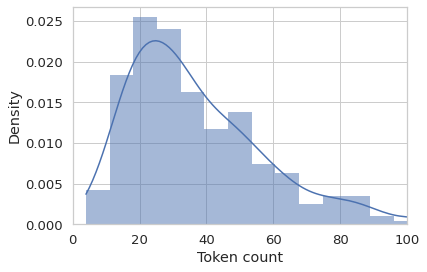

In [84]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens2 = []

for txt in data_model.clean_igcomment:
  tokens = tokenizer_bert.encode(txt)
  token_lens2.append(len(tokens))

sns.histplot(token_lens2, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [85]:
# Dapat dilihat dari grafik diatas, sebagian besar kalimat tampaknya berisi kurang dari 80 token
# Maka, tentukan max_length adalah 80

MAX_LEN = 100

### Input Formatting Data Training & Testing

In [86]:
# Buat fungsi untuk iterasi pada setiap kalimat pada keseluruhan data
def regular_encode(texts, tokenizer, maxlen = 512):
    encode_bert = tokenizer_bert.batch_encode_plus(
        texts, 
        return_attention_masks = False, 
        return_token_type_ids = False, 
        pad_to_max_length = True, 
        max_length = maxlen)
    return np.array(encode_bert['input_ids'])

### Split Data Train, Validation, Testing

In [87]:
train, test= train_test_split(data_model, test_size=0.2, random_state=42)
Xtrain, ytrain = train['clean_igcomment'], train['Sentiment']
Xtest, ytest = test['clean_igcomment'], test['Sentiment']

#splitting the train set into train and validation
Xtrain,Xval,ytrain,yval=train_test_split(Xtrain,ytrain,
                                             test_size=0.2,random_state=42)

In [88]:
#pass our texts to the tokenizer. 

Xtrain_encoded = regular_encode(Xtrain.astype('str'), tokenizer_bert, maxlen = 100)
ytrain_encoded = tf.keras.utils.to_categorical(ytrain, num_classes = 2, dtype = 'int32')

Xval_encoded = regular_encode(Xtrain.astype('str'), tokenizer_bert, maxlen = 100)
yval_encoded = tf.keras.utils.to_categorical(ytrain, num_classes = 2, dtype = 'int32')

Xtest_encoded = regular_encode(Xtest.astype('str'), tokenizer_bert, maxlen = 100)
ytest_encoded = tf.keras.utils.to_categorical(ytest, num_classes = 2, dtype = 'int32')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword argumen

In [89]:
#Build model BERT dengan transformer
def build_model(transformer, loss = 'categorical_crossentropy', max_len = 512):
    input_word_ids = tf.keras.layers.Input(shape = (max_len,), dtype = tf.int32, name = "input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    #adding dropout layer
    x = tf.keras.layers.Dropout(0.40)(cls_token)

    #using a dense layer of 2 neurons as the number of unique categories is 2. 
    out = tf.keras.layers.Dense(2, activation = 'softmax')(x)

    bert_model = tf.keras.Model(inputs = input_word_ids, outputs = out)
    bert_model.compile(tf.keras.optimizers.Adam(lr = 3e-5), loss = loss, metrics = ['accuracy'])
    return bert_model

In [90]:
#Transformer yang digunakan 
transformer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')
bert_model = build_model(transformer, max_len = 100)
bert_model.summary()

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 100)]            0         
                                                                 
 tf_distil_bert_model (TFDis  TFBaseModelOutput(last_h  66362880 
 tilBertModel)               idden_state=(None, 100,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem (S  (None, 768)              0         
 licingOpLambda)                                                 
                                                                 
 dropout_19 (Dropout)        (None, 768)               0         
                                                             

### Training Model

In [91]:
EPOCHS = 10
BATCH_SIZE = 32

#preparing datasets
train_dataset = (tf.data.Dataset.from_tensor_slices((Xtrain_encoded, ytrain_encoded)).shuffle(2048).batch(BATCH_SIZE))
val_dataset = (tf.data.Dataset.from_tensor_slices((Xval_encoded, yval_encoded)).shuffle(1024).batch(BATCH_SIZE))
test_dataset = (tf.data.Dataset.from_tensor_slices((Xtest_encoded, ytest_encoded)).shuffle(1024).batch(BATCH_SIZE))

In [92]:
%%time
train_history = bert_model.fit(train_dataset, validation_data=val_dataset, epochs = EPOCHS)

Epoch 1/10
8/8 [==============================] - 23s 899ms/step - loss: 0.7817 - accuracy: 0.5625 - val_loss: 0.6865 - val_accuracy: 0.5703
Epoch 2/10
8/8 [==============================] - 3s 414ms/step - loss: 0.7426 - accuracy: 0.5078 - val_loss: 0.6845 - val_accuracy: 0.6016
Epoch 3/10
8/8 [==============================] - 3s 414ms/step - loss: 0.7382 - accuracy: 0.4961 - val_loss: 0.6853 - val_accuracy: 0.5352
Epoch 4/10
8/8 [==============================] - 3s 414ms/step - loss: 0.7437 - accuracy: 0.4688 - val_loss: 0.6695 - val_accuracy: 0.5664
Epoch 5/10
8/8 [==============================] - 3s 418ms/step - loss: 0.7222 - accuracy: 0.5078 - val_loss: 0.6492 - val_accuracy: 0.6523
Epoch 6/10
8/8 [==============================] - 3s 427ms/step - loss: 0.7068 - accuracy: 0.5430 - val_loss: 0.5954 - val_accuracy: 0.7695
Epoch 7/10
8/8 [==============================] - 3s 422ms/step - loss: 0.6268 - accuracy: 0.6484 - val_loss: 0.5092 - val_accuracy: 0.7969
Epoch 8/10
8/8 [===

In [93]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

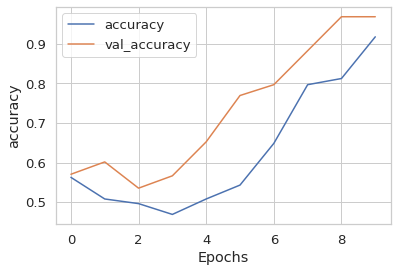

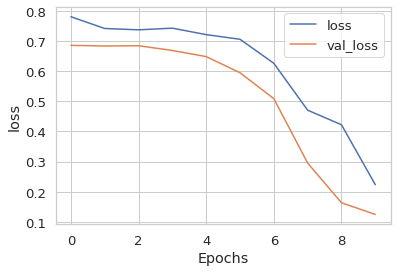

In [94]:
plot_graphs(train_history, 'accuracy')
plot_graphs(train_history, 'loss')

In [95]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, train_history.history['accuracy'][i], train_history.history['loss'][i], train_history.history['val_accuracy'][i], train_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.562500 	   0.781730 	   0.570312 	   0.686504
       2   0.507812 	   0.742644 	   0.601562 	   0.684483
       3   0.496094 	   0.738190 	   0.535156 	   0.685292
       4   0.468750 	   0.743730 	   0.566406 	   0.669546
       5   0.507812 	   0.722226 	   0.652344 	   0.649154
       6   0.542969 	   0.706775 	   0.769531 	   0.595446
       7   0.648438 	   0.626821 	   0.796875 	   0.509231
       8   0.796875 	   0.470853 	   0.882812 	   0.294992
       9   0.812500 	   0.422394 	   0.968750 	   0.162859
      10   0.917969 	   0.223048 	   0.968750 	   0.124066


In [96]:
bert_model.save_weights('bert-model.h5')

### Evaluate Model

In [97]:
# Prediksi pada data validasi
y_pred = np.argmax(bert_model.predict(Xval_encoded), axis=1)
y_true = np.argmax(yval_encoded, axis=1)

loss, accuracy = bert_model.evaluate(Xval_encoded, yval_encoded)

8/8 [==============================] - 2s 98ms/step - loss: 0.1241 - accuracy: 0.9688


In [98]:
# Menampilkan Confusion matrix
confusion_matrix(y_true, y_pred)

array([[119,   0],
       [  8, 129]])

In [99]:
# Tampilkan laporan klasifikasi model pada data testing
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       127
           1       0.94      1.00      0.97       129

    accuracy                           0.97       256
   macro avg       0.97      0.97      0.97       256
weighted avg       0.97      0.97      0.97       256



# 05 Kesimpulan

* Jumlah total komentar berdasarkan sentimen positive dan negative: 400 data.

* Menghasilkan sentimen yang memiliki kecenderungan relatif sama dikarenakan jumlah positive dam  egative yang sering muncul pada wordcloud.

* Berdasarkan hasil performance model algoritma BERT dengan Fine Tuning memberikan insight terbaik dibandingkan algoritma seperti Logistic Regression maupun Bi-LSTM dengan Word2Vect dari segi penilaian akurasi  dan waktu yang dihasilkan pada Sentiment Analysis Cyberbullying pada Instagram Comment.



|Algoritma|Accuracy|Time|
|---------|--------|----|
|Logistic Regression|96.25%|5.01 s|
|Bi-LSTM+Word2Vect|80.00%|8.29 s|
|BERT Fine Tuning|96.88%|36 s|



